In [248]:
import re
import codecs
from gensim.models import word2vec
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm_normal
from tqdm import tqdm
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

In [86]:
tqdm.pandas()

In [17]:
sentences = word2vec.Text8Corpus("nlp8_name_changed.txt")
model = word2vec.Word2Vec(sentences, size=300, min_count=10)

In [25]:
model.save("w2v.model")

In [27]:
def nlp90(has_model = False):
    if has_model:
        model = Word2Vec.load("w2v.model")
    else:
        sentences = word2vec.Text8Corpus("nlp8_name_changed.txt")
        model = word2vec.Word2Vec(sentences, size=300, min_count=10)
        model.save("w2v.model")
    return model

if __name__ == "__main__":
    model = nlp90(has_model = True)
    print(model.wv.word_vec("United_States"))
    print("===================")
    print(model.wv.similarity("United_States", "U.S."))
    print("===================")
    print(model.wv.most_similar("United_States"))
    print("===================")
    print(model.wv.most_similar(positive=("Spain", "Madrid"), negative=("Athen")))

[ -6.48639426e-02  -3.95045504e-02  -1.04238951e+00  -1.11987197e+00
   6.10347092e-01  -2.16386184e-01  -1.17453992e-01   7.38157094e-01
  -9.26826179e-01   4.03636485e-01  -6.10093832e-01  -4.33612168e-01
  -4.31981981e-01  -5.70326090e-01  -6.60110474e-01   8.27914298e-01
  -1.72803059e-01  -1.26644993e+00   1.29662067e-01   2.98472971e-01
   4.76315081e-01  -6.62766218e-01   9.69754279e-01  -3.23154926e-01
   1.24300134e+00  -1.10932827e+00  -4.51313317e-01  -1.39346349e+00
  -4.20786649e-01   7.04444572e-02   6.25556409e-02   1.15651000e+00
   2.39548281e-01   9.12443101e-01  -7.80276060e-01   6.05163813e-01
  -4.39688653e-01   8.06109667e-01   2.64202002e-02  -2.52180368e-01
  -1.74678981e-01  -1.82335109e-01   9.63897645e-01   1.07092404e+00
   7.09167793e-02  -1.10002302e-01  -8.83931935e-01  -3.84289682e-01
  -9.70706940e-01  -1.26591849e+00   2.53194183e-01  -1.15662229e+00
   1.74398690e-01  -8.11591327e-01  -1.42540699e-02   4.53312993e-01
   7.37676203e-01   2.06678700e+00

In [33]:
def nlp91():
    flg = 0
    result_ls = []
    with codecs.open("questions-words.txt", "r", encoding="utf-8") as f:
        for i in f:
            if i.startswith(": family"):
                flg = 1
                continue
            if flg > 0:
                if not i.startswith(":"):
                    result_ls.append(i.strip())
                else:
                    flg = -1
            if flg < 0:
                break
    with codecs.open("nlp92.txt", "w", encoding="utf-8") as f:
        f.write("\n".join(result_ls))
    return result_ls
if __name__ == "__main__":
    print(nlp91())

['boy girl brother sister', 'boy girl brothers sisters', 'boy girl dad mom', 'boy girl father mother', 'boy girl grandfather grandmother', 'boy girl grandpa grandma', 'boy girl grandson granddaughter', 'boy girl groom bride', 'boy girl he she', 'boy girl his her', 'boy girl husband wife', 'boy girl king queen', 'boy girl man woman', 'boy girl nephew niece', 'boy girl policeman policewoman', 'boy girl prince princess', 'boy girl son daughter', 'boy girl sons daughters', 'boy girl stepbrother stepsister', 'boy girl stepfather stepmother', 'boy girl stepson stepdaughter', 'boy girl uncle aunt', 'brother sister brothers sisters', 'brother sister dad mom', 'brother sister father mother', 'brother sister grandfather grandmother', 'brother sister grandpa grandma', 'brother sister grandson granddaughter', 'brother sister groom bride', 'brother sister he she', 'brother sister his her', 'brother sister husband wife', 'brother sister king queen', 'brother sister man woman', 'brother sister nephew

In [65]:
def PRMI_most_similar(wd_a, wd_b, wd_c, PRMI, t_ls):
    """ wd_b + wd_c - wd_a"""
    try:
        a_ind = t_ls.index(wd_a)
        b_ind = t_ls.index(wd_b)
        c_ind = t_ls.index(wd_c)
    except:
        return ["None", "0"]
    target_vec = PRMI[a_ind, :] - PRMI[b_ind, :] + PRMI[c_ind, :]
    target_vec = target_vec / np.linalg.norm(target_vec)
    PRMI_norm = np.linalg.norm(PRMI.T, axis = 0)
    result = target_vec.dot(PRMI.T / PRMI_norm)
    t_ls = np.array(t_ls)[~np.isnan(result)]
    result = result[~np.isnan(result)]
    try:
        top = np.argsort(result)[-1]
    except:
        return ["None", "0"]
    return [t_ls[top], str(result[top])]


if __name__ == "__main__":
    PRMI_path = "decomposed_PRMI"
    PRMI = pickle.load(open(PRMI_path, "rb"))
    ct_t = pickle.load(open("ct_t","rb"))
    t_ls =list(ct_t.keys())
    print(PRMI_most_similar("Spain", "U.S.", "Madrid", PRMI, t_ls))

/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


['Spain', '0.180745227559']


In [73]:
def nlp92(model, PRMI_path):
    PRMI = pickle.load(open(PRMI_path, "rb"))
    ct_t = pickle.load(open("ct_t","rb"))
    t_ls =list(ct_t.keys())
    with codecs.open("model_res.txt", "w", encoding="utf-8") as w2v_f:
        with codecs.open("PRMI_res.txt", "w", encoding="utf-8") as PRMI_f:
            with codecs.open("nlp92.txt", "r", encoding="utf-8") as f:
                for i in tqdm(f):
                    wd_ls = i.split()
                    try:
                        model_res = list(model.wv.most_similar(positive=(wd_ls[1], wd_ls[2]), negative=(wd_ls[0]))[0])
                        model_res[1] = str(model_res[1])
                    except KeyError:
                        model_res = list(["None", "0"])
                    PRMI_res = list(PRMI_most_similar(wd_ls[0], wd_ls[1], wd_ls[2], PRMI, t_ls))
                    w2v_f.write(" ".join(wd_ls + model_res) + "\n")
                    PRMI_f.write(" ".join(wd_ls + PRMI_res) + "\n")

    print("finished")
    
if __name__ == "__main__":
    model = nlp90(has_model=True)
    PRMI_path = "decomposed_PRMI"
    nlp92(model, PRMI_path)

A Jupyter Widget

/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.



finished


In [72]:
with open("model_res.txt", "r", encoding="utf-8") as f:
    print(len(f.readlines()))

1


In [80]:
def nlp93(PRMI_res_path, model_res_path):
    with codecs.open(PRMI_res_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
    result_PRMI = [line.split()[3] == line.split()[4] for line in lines]
    with codecs.open(model_res_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
    result_model = [line.split()[3] == line.split()[4] for line in lines]
    return sum(result_PRMI) / len(result_PRMI), sum(result_model) / len(result_model)

if __name__ == "__main__":
    PRMI_res_path = "PRMI_res.txt"
    model_res_path = "model_res.txt"
    print(nlp93(PRMI_res_path, model_res_path))

(0.005928853754940711, 0.011857707509881422)


In [138]:
def get_similarity(df, mode, PRMI=None, model=None, t_ls=None):
    """ mode ... ("PRMI", "w2v")"""
    wd_1 = df["Word 1"]
    wd_2 = df["Word 2"]
    if mode == "PRMI":
        try:
            ind_wd_1 = t_ls.index(wd_1)
            ind_wd_2 = t_ls.index(wd_2)
        except:
            return 0
        norm_1 = np.linalg.norm(PRMI[ind_wd_1,:])
        norm_2 = np.linalg.norm(PRMI[ind_wd_2,:])
        return PRMI[ind_wd_1,:].dot(PRMI[ind_wd_2,:].T) / norm_1 / norm_2
    elif mode == "w2v":
        try:
            return model.wv.similarity(wd_1, wd_2)
        except:
            return 0
    
def nlp94():
    PRMI = pickle.load(open("decomposed_PRMI","rb"))
    ct_t = pickle.load(open("ct_t","rb"))
    t_ls =list(ct_t.keys())
    df_1 = pd.read_csv("set1.csv", encoding="utf-8")
    df_2 = pd.read_csv("set2.csv", encoding="utf-8")
    df = pd.concat((df_1, df_2), axis=0).ix[:,df_1.columns]
    df["PRMI"] = df.apply(get_similarity,  axis=1, mode = "PRMI", PRMI = PRMI, t_ls = t_ls)
    df["model"] = df.apply(get_similarity, axis=1, mode = "w2v", model=model)
    return df

if __name__ == "__main__":
    print(nlp94())

/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


           Word 1         Word 2  Human (mean)     1      2     3   4   5   6  \
0            love            sex          6.77   9.0   6.00   8.0   8   7   8   
1           tiger            cat          7.35   9.0   7.00   8.0   7   8   9   
2           tiger          tiger         10.00  10.0  10.00  10.0  10  10  10   
3            book          paper          7.46   8.0   8.00   7.0   7   8   9   
4        computer       keyboard          7.62   8.0   7.00   9.0   9   8   8   
5        computer       internet          7.58   8.0   6.00   9.0   8   8   8   
6           plane            car          5.77   6.0   6.00   7.0   5   3   6   
7           train            car          6.31   7.0   7.50   7.5   5   3   6   
8       telephone  communication          7.50   7.0   6.50   8.0   8   6   8   
9      television          radio          6.77   7.0   7.50   9.0   7   3   6   
10          media          radio          7.42   7.0   7.00   8.5   9   6   7   
11           drug          a

In [164]:
def spearman(list_a, list_b):
    N = len(list_a)                                                          
    return 1 - ((6 * np.sum((list_a - list_b) ** 2) / float(N ** 3 - N)))
                 
def nlp95():
    df = nlp94()
    w2v = df["model"]
    PRMI = df["PRMI"]
    human = df["Human (mean)"]
    return spearman(w2v, human), spearman(PRMI, human)


if __name__ == "__main__":
    print(nlp95())

/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/masakitashiro/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


(0.998356292886398, 0.998598537229238)


In [170]:
model.wv.most_similar("Italy")

[('Spain', 0.8811458349227905),
 ('Germany', 0.8620436191558838),
 ('Italy,', 0.8586248159408569),
 ('France,', 0.852537214756012),
 ('Germany,', 0.8434129953384399),
 ('Spain,', 0.8338338136672974),
 ('Denmark', 0.8133776187896729),
 ('Russia', 0.8117365837097168),
 ('Finland', 0.8105962872505188),
 ('Belgium', 0.8096439838409424)]

In [179]:
model.wv.most_similar(topn=150, positive=("Spain","U.S.", "United_States", "Italy","Germany", "France",
                                         "Denmark","Finland","Belgium","Russia","Brazil","Japan","Sweden",
                                         "Chile","Canada","Korea","Portugal",'Netherlands',"Poland",
                                          "India","Taiwan","Russia"))

[('Yugoslavia', 0.8440526723861694),
 ('Norway', 0.8440035581588745),
 ('South_Africa', 0.8381773233413696),
 ('Bulgaria', 0.8287234306335449),
 ('Turkey', 0.8279649615287781),
 ('Greece', 0.8234614729881287),
 ('Switzerland', 0.8225812911987305),
 ('China', 0.8200114965438843),
 ('Germany,', 0.819084644317627),
 ('Egypt', 0.8138667345046997),
 ('Angola', 0.8124475479125977),
 ('Hungary', 0.8117480874061584),
 ('Pakistan', 0.8080264925956726),
 ('Italy,', 0.8063472509384155),
 ('Serbia', 0.805371105670929),
 ('Britain', 0.8052099347114563),
 ('Austria', 0.8048922419548035),
 ('Turkey,', 0.8037735223770142),
 ('Russia,', 0.7972716689109802),
 ('Cuba', 0.7972080707550049),
 ('Ukraine', 0.7941878437995911),
 ('France,', 0.7853826880455017),
 ('Afghanistan', 0.7843199372291565),
 ('Argentina', 0.7834755182266235),
 ('Czechoslovakia', 0.7777174711227417),
 ('China,', 0.7771804928779602),
 ('Belgium,', 0.7757110595703125),
 ('Britain,', 0.7757100462913513),
 ('Iraq', 0.7732406854629517),
 ('

In [208]:
def nlp96():
    countries = model.wv.most_similar(topn=150, positive=("Spain","U.S.", "United_States", "Italy","Germany", "France",
                                         "Denmark","Finland","Belgium","Russia","Brazil","Japan","Sweden",
                                         "Chile","Canada","Korea","Portugal",'Netherlands',"Poland",
                                          "India","Taiwan","Russia"))
    countries = [country[0] for country in countries if re.match(r"[A-Z]", country[0])]
    country_vecs = [model.wv.word_vec(country) for country in countries]
    return countries, country_vecs

if __name__ == "__main__":
    print(nlp96())

(['Yugoslavia', 'Norway', 'South_Africa', 'Bulgaria', 'Turkey', 'Greece', 'Switzerland', 'China', 'Germany,', 'Egypt', 'Angola', 'Hungary', 'Pakistan', 'Italy,', 'Serbia', 'Britain', 'Austria', 'Turkey,', 'Russia,', 'Cuba', 'Ukraine', 'France,', 'Afghanistan', 'Argentina', 'Czechoslovakia', 'China,', 'Belgium,', 'Britain,', 'Iraq', 'Uruguay', 'Australia', 'Malaysia', 'Africa', 'Macedonia', 'Japan,', 'Norway,', 'Indonesia', 'United_Kingdom', 'Austria,', 'Poland,', 'Brazil,', 'Israel,', 'Greece,', 'Europe', 'Americas', 'Ireland', 'Siberia', 'Iraq,', 'Nigeria', 'Spain,', 'Libya', 'Ireland,', 'Syria', 'Thailand', 'India,', 'Egypt,', 'Palestine', 'Hungary,', 'Algeria', 'Sri_Lanka', 'Asia', 'Republic', 'Scotland', 'Cambodia', 'Serbia,', 'Bangladesh', 'Bosnia', 'Burma', 'Netherlands,', 'Australia,', 'Peru', 'Czechoslovakia,', 'Denmark,', 'Malaysia,', 'Vardar', 'Romania', 'Portugal,', 'Europe,', 'Afghanistan,', 'Finland,', 'Philippines', 'Armenia', 'Warsaw', 'Pakistan,', 'Singapore', 'Canada,'

In [200]:
df = pd.read_csv("set1.csv")
df.columns = list("abcdefghijklmnop")
a = [1,2,3]
b = [2,3,4]
def hoge(df):
    return pd.Series([a, b])
df[["hoge", "hoge2"]] = df.apply(hoge, axis=1)
df

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,hoge,hoge2
0,love,sex,6.77,9.0,6.00,8.0,8,7,8,8.0,4,7.0,2,6.0,7,8,"[1, 2, 3]","[2, 3, 4]"
1,tiger,cat,7.35,9.0,7.00,8.0,7,8,9,8.5,5,6.0,9,7.0,5,7,"[1, 2, 3]","[2, 3, 4]"
2,tiger,tiger,10.00,10.0,10.00,10.0,10,10,10,10.0,10,10.0,10,10.0,10,10,"[1, 2, 3]","[2, 3, 4]"
3,book,paper,7.46,8.0,8.00,7.0,7,8,9,7.0,6,7.0,8,9.0,4,9,"[1, 2, 3]","[2, 3, 4]"
4,computer,keyboard,7.62,8.0,7.00,9.0,9,8,8,7.0,7,6.0,8,10.0,3,9,"[1, 2, 3]","[2, 3, 4]"
5,computer,internet,7.58,8.0,6.00,9.0,8,8,8,7.5,7,7.0,7,9.0,5,9,"[1, 2, 3]","[2, 3, 4]"
6,plane,car,5.77,6.0,6.00,7.0,5,3,6,7.0,6,6.0,6,7.0,3,7,"[1, 2, 3]","[2, 3, 4]"
7,train,car,6.31,7.0,7.50,7.5,5,3,6,7.0,6,6.0,6,9.0,4,8,"[1, 2, 3]","[2, 3, 4]"
8,telephone,communication,7.50,7.0,6.50,8.0,8,6,8,8.0,7,5.0,9,9.0,8,8,"[1, 2, 3]","[2, 3, 4]"
9,television,radio,6.77,7.0,7.50,9.0,7,3,6,7.0,8,5.5,6,8.0,6,8,"[1, 2, 3]","[2, 3, 4]"


In [227]:
def nlp97():
    countries, country_vecs = nlp96()
    km = KMeans(n_clusters=5)
    predict = km.fit_predict(country_vecs)
    df = pd.DataFrame(np.array([countries, predict]).T)
    df.columns = ["nation", "group"]
    df = df.sort_values("group")
    print(df.groupby("group"))
    return df
    
    
if __name__ == "__main__":
    print(nlp97())

              nation group
48           Nigeria     0
136     Philippines,     0
67             Burma     0
66            Bosnia     0
65        Bangladesh     0
64           Serbia,     0
63          Cambodia     0
102       Argentina,     0
103       Indonesia,     0
70              Peru     0
59         Sri_Lanka     0
57          Hungary,     0
56         Palestine     0
53          Thailand     0
52             Syria     0
50             Libya     0
106             Fiji     0
95           Croatia     0
47             Iraq,     0
58           Algeria     0
71   Czechoslovakia,     0
72          Denmark,     0
73         Malaysia,     0
94          Romania,     0
97           Sweden,     0
92              Iran     0
98            Sicily     0
90             Timor     0
89            Kosovo     0
99          Colombia     0
..               ...   ...
22       Afghanistan     2
23         Argentina     2
93             Turks     2
27          Britain,     2
28              Iraq     2
3

In [232]:
countries, country_vecs = nlp96()

In [236]:
cl = AgglomerativeClustering(linkage="ward", n_clusters=5)
predict = cl.fit_predict(country_vecs)
predict

array([3, 3, 3, 0, 3, 0, 3, 1, 0, 0, 3, 0, 3, 0, 3, 2, 3, 3, 0, 3, 3, 0, 3,
       3, 3, 1, 0, 0, 0, 3, 2, 3, 1, 0, 1, 3, 3, 2, 0, 0, 0, 3, 0, 1, 3, 2,
       3, 3, 3, 0, 3, 0, 3, 3, 1, 0, 3, 3, 3, 3, 1, 4, 2, 3, 3, 3, 3, 3, 0,
       1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0, 3, 3, 3, 4, 3, 3, 3, 3, 3])

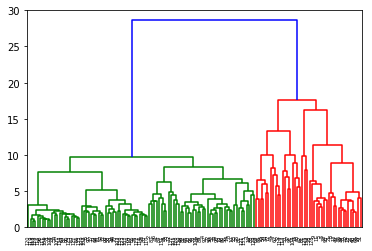

In [245]:
def nlp97():
    countries, country_vecs = nlp96()
    Z = linkage(country_vecs, "ward")
    dn = dendrogram(Z)
    plt.show()
    

if __name__ == "__main__":
    nlp97()

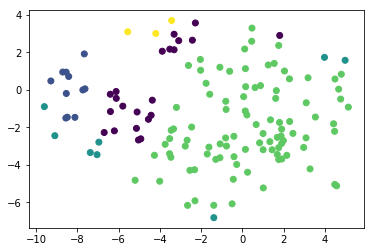

In [255]:
def nlp99():
    countries, country_vecs = nlp96()
    tsne = TSNE(n_components=2)
    reduced_vec = tsne.fit_transform(country_vecs)
    plt.scatter(reduced_vec[:,0], reduced_vec[:,1], c = predict)
    plt.show()
    
    
if __name__ == "__main__":
    nlp99()

In [261]:
hoge = pd.read_clipboard()
hoge

,区分,項目,正,誤
1,助詞誤り,JOB_MESSAGE_TITLE,本場フランスをイメージした,本場フランスはイメージした
JOB_MESSAGE_CONTENT,紅茶のアレンジ方法,紅茶をアレンジ方法,NaN,NaN
JOB_OFFER_CONTENT,紅茶の知識が身に付く,紅茶に知識が身に付く,NaN,NaN


In [262]:
hoge["正"] = hoge["正"].fillna(method="ffill")
hoge

,区分,項目,正,誤
1,助詞誤り,JOB_MESSAGE_TITLE,本場フランスをイメージした,本場フランスはイメージした
JOB_MESSAGE_CONTENT,紅茶のアレンジ方法,紅茶をアレンジ方法,本場フランスをイメージした,NaN
JOB_OFFER_CONTENT,紅茶の知識が身に付く,紅茶に知識が身に付く,本場フランスをイメージした,NaN
